In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('Ph.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [3]:
data.describe()

,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


In [4]:
data.corr()

,X,Y
X,1.000000,-0.339511
Y,-0.339511,1.000000


In [5]:
data.isnull().sum()

X    0
Y    0
dtype: int64

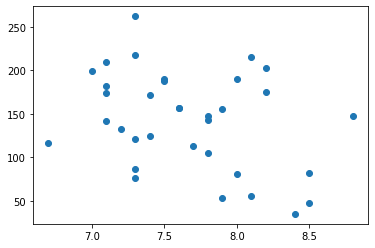

In [6]:
plt.scatter(data['X'],data['Y'])

In [8]:
from scipy import stats
p=np.abs(stats.zscore(data))
print(p)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


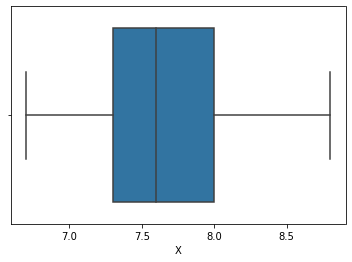

In [9]:
sns.boxplot(x=data['X'])

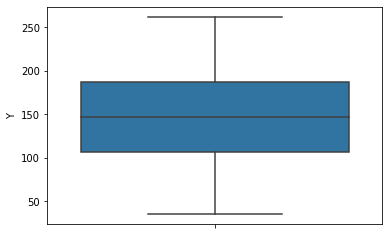

In [10]:
sns.boxplot(y=data['Y'])

In [12]:
filter=data[(p < 3).all(axis=1)]
filter.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [14]:
normdata=data.copy()
normdata=(normdata-normdata.min())/(normdata.max()-normdata.min())
normdata.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [15]:
data_train,data_test = train_test_split(norm_data,test_size=0.1)
data_train.head()


,X,Y
33,0.285714,0.229075
6,0.285714,0.801762
21,1.000000,0.493392
12,0.285714,1.000000
0,0.428571,0.537445


In [16]:
print("Length of dataset:",len(data_test))
data_x = np.array(data_train['X'])
data_y = np.array(data_train['Y'])
data_x

Length of dataset: 4


array([0.28571429, 0.28571429, 1.        , 0.28571429, 0.42857143,
       0.61904762, 0.47619048, 0.52380952, 0.38095238, 0.33333333,
       0.28571429, 0.57142857, 0.14285714, 0.85714286, 0.23809524,
       0.57142857, 0.19047619, 0.19047619, 0.52380952, 0.38095238,
       0.66666667, 0.66666667, 0.28571429, 0.85714286, 0.        ,
       0.61904762, 0.33333333, 0.80952381, 0.19047619, 0.71428571])

In [18]:
m=1
c=-1
iter=1
epochs=100
alpha=0.1
ns=len(data_train['X'])
error=[]

In [21]:
for iter in range(epochs):
  err=0
  for i in range(0,ns):
    err+=((data_y[i]-(m*data_x[i])-c))**2
    der_m=(-1)*((data_y[i]-(m * data_x[i]) - c))*(data_x[i])
    der_c=(-1)*(data_y[i]-(m*data_x[i])-c)
    change_m=(-1)*alpha*der_m
    change_c=(-1)*alpha*der_c
    m=m+change_m
    c=c+change_c
  err=(1/(2*len(data_train['X'])))*(err)
  error.append(err)
print("m=",m,"\nc=",c)

m= -0.3926241682717726 
c= 0.6228633355536319


In [32]:
data_train_pred=m*data_train['X']+c
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(data_train['Y'],data_train_pred)
print("Mean Square Error of Training data:",mse)

Mean Square Error of Training data: 0.05699615864017922


In [33]:
data_train_x=np.array(data_train['X'])
data_train_y=np.array(data_train['Y'])
pred2=[]
for i in data_train_x:
  pred2.append(m*i+c)

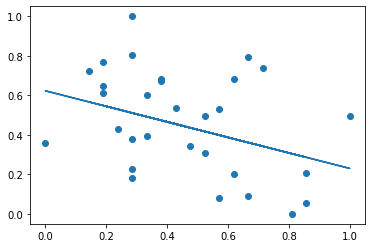

In [34]:
plt.plot(data_train_x,pred2)
plt.scatter(data_train_x,data_train_y)

In [36]:
data_test_pred=m*data_test['X']+c
mse2=mean_squared_error(data_test['Y'],data_test_pred)
print("Mean Square Error of Testing Data:",mse2)

Mean Square Error of Testing Data: 0.022857950679526534


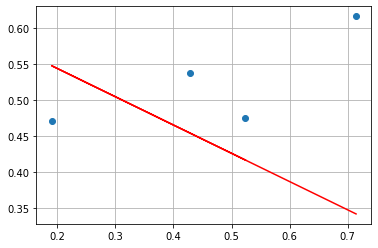

In [37]:
plt.scatter(data_test['X'],data_test['Y'])
plt.plot(data_test['X'],data_test_pred,'red')
plt.grid()

In [38]:
min_x=data['X'].min()
max_x=data['X'].max()
min_y=data['Y'].min()
max_y=data['Y'].max()

In [39]:
input_x=float(input("Enter the pH of water:"))
input_xx=input_x
input_x=(input_x-min_x)/(max_x-min_x)
output_y=m*input_x+c
output_y=output_y*(max_y-min_y)+min_y
print("Total number of bicarbonates in well water having pH =",input_xx,"is",output_y)

Enter the pH of water:6
Total number of bicarbonates in well water having pH = 6.0 is 206.09853923657192
